#### K-MEANS 

In [58]:
import pandas as pd
from matplotlib import pyplot as plt

In [59]:
data=pd.read_csv("C:/Users/Administrator/2023_Data_Mining_Coffee_Quality_Dataset/cleaned_data.csv")

In [60]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [61]:
X=data.drop("Total.Cup.Points",axis=1)


In [62]:
feature_names=X.columns

In [63]:
X.head()

,Species,Country.of.Origin,Harvest.Year,Variety,Processing.Method,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_mean_meters
0,0,8,5,5,4,0,0.0,2,0,2075.0
1,0,8,5,15,4,0,0.0,2,1,2075.0
2,0,9,3,2,4,0,0.0,2,0,1700.0
3,0,8,5,5,0,0,0.0,2,2,2000.0
4,0,8,5,15,4,0,0.0,2,2,2075.0


In [64]:
X.describe()

,Species,Country.of.Origin,Harvest.Year,Variety,Processing.Method,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_mean_meters
count,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.00000,1326.000000,1326.000000
mean,0.021116,13.903469,4.585219,10.549774,3.107843,0.474359,0.174208,1.78733,3.481900,1780.296794
std,0.143826,10.336440,1.832180,9.258641,1.596595,2.551600,0.835422,0.54255,5.082643,7926.787140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,0.000000,3.250000,3.000000,5.000000,3.000000,0.000000,0.000000,2.00000,0.000000,1200.000000
50%,0.000000,11.000000,4.000000,5.000000,4.000000,0.000000,0.000000,2.00000,2.000000,1450.000000
75%,0.000000,20.000000,6.000000,15.000000,4.000000,0.000000,0.000000,2.00000,4.000000,1775.030545
max,1.000000,35.000000,9.000000,28.000000,4.000000,63.000000,11.000000,2.00000,47.000000,190164.000000


In [65]:
#imamo dosta kategorickih atributa
for x in feature_names:
    print(x,X[x].unique())

Species [0 1]
Country.of.Origin [ 8  9  0 24 31 32 13  2  4 19 30 11 27 21 28 15 29  3 22 23  7 14  6 33
 10  1 34 25 26 17 16 35 20 18  5 12]
Harvest.Year [5 3 4 1 6 2 7 0 8 9]
Variety [ 5 15  2  3  7 21 25 23  9 28 22  8  4 16 27 26 14 10 19 17 11 20  0  6
 13 24  1 12 18]
Processing.Method [4 0 2 3 1]
Category.One.Defects [ 0  1  2  4  3  6 10  5 31 11 12  7 23 15  9 20 63]
Quakers [ 0.  1.  4.  2.  5.  6.  3. 11.  7.  9.  8.]
Color [2 1 0]
Category.Two.Defects [ 0  1  2  4  8  3  9  7  6 18  5 15 10 29 16 13 40 26 32 11 21 14 12 20
 17 23 22 19 30 34 45 38 47 31 28 27]
altitude_mean_meters [2.07500000e+03 1.70000000e+03 2.00000000e+03 1.77503054e+03
 1.63500000e+03 1.82250000e+03 1.90500000e+03 1.87200000e+03
 1.94300000e+03 6.09600000e+02 2.08000000e+03 1.50000000e+03
 1.45000000e+03 1.85000000e+03 2.01900000e+03 1.30000000e+03
 1.32000000e+03 2.11200000e+03 1.25000000e+03 1.95000000e+03
 1.40000000e+03 1.20000000e+03 1.77500000e+03 1.80000000e+03
 1.94100000e+03 1.20000000e+01 1.

Ima dosta kategorickih atributa, neke bi mozda bilo najbolje izostaviti poput kolone Region jer ima previse kategorija, a kad bih uradila one hot encoding skup bi patio od dimenzionalnosti 

In [66]:
X.drop(labels=["Country.of.Origin","Variety","Processing.Method"],axis=1,inplace=True)
feature_names=X.columns

Od pravih kategorickih atributa su ostali Species (samo 1 i 0 tako da necu dirati) i Color (vrednosti 0, 1, 2)

In [67]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(handle_unknown="ignore")
encoder_df=pd.DataFrame(encoder.fit_transform(X[["Color"]]).toarray())


In [68]:
X=X.join(encoder_df)
X.head()

,Species,Harvest.Year,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_mean_meters,0,1,2
0,0,5,0,0.0,2,0,2075.0,0.0,0.0,1.0
1,0,5,0,0.0,2,1,2075.0,0.0,0.0,1.0
2,0,3,0,0.0,2,0,1700.0,0.0,0.0,1.0
3,0,5,0,0.0,2,2,2000.0,0.0,0.0,1.0
4,0,5,0,0.0,2,2,2075.0,0.0,0.0,1.0


In [69]:
X.drop("Color",axis=1,inplace=True)


In [70]:
X.rename(columns={0 : "Color_0", 1: "Color_1", 2 : "Color_2"},inplace=True)
X.head()

,Species,Harvest.Year,Category.One.Defects,Quakers,Category.Two.Defects,altitude_mean_meters,Color_0,Color_1,Color_2
0,0,5,0,0.0,0,2075.0,0.0,0.0,1.0
1,0,5,0,0.0,1,2075.0,0.0,0.0,1.0
2,0,3,0,0.0,0,1700.0,0.0,0.0,1.0
3,0,5,0,0.0,2,2000.0,0.0,0.0,1.0
4,0,5,0,0.0,2,2075.0,0.0,0.0,1.0


In [71]:
feature_names=X.columns

Standardizujemo podatke

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [73]:
X=pd.DataFrame(scaler.fit_transform(X),columns=feature_names)


In [74]:
X.describe()

,Species,Harvest.Year,Category.One.Defects,Quakers,Category.Two.Defects,altitude_mean_meters,Color_0,Color_1,Color_2
count,1.326000e+03,1.326000e+03,1326.000000,1.326000e+03,1326.000000,1.326000e+03,1.326000e+03,1326.000000,1.326000e+03
mean,-6.430251e-17,2.009453e-16,0.000000,1.607563e-17,0.000000,-5.358543e-18,-4.822688e-17,0.000000,4.286834e-17
std,1.000377e+00,1.000377e+00,1.000377,1.000377e+00,1.000377,1.000377e+00,1.000377e+00,1.000377,1.000377e+00
min,-1.468729e-01,-2.503547e+00,-0.185977,-2.086057e-01,-0.685316,-2.245510e-01,-2.600632e-01,-0.306691,-2.386833e+00
25%,-1.468729e-01,-8.655355e-01,-0.185977,-2.086057e-01,-0.685316,-7.323468e-02,-2.600632e-01,-0.306691,4.189653e-01
50%,-1.468729e-01,-3.195317e-01,-0.185977,-2.086057e-01,-0.291671,-4.168415e-02,-2.600632e-01,-0.306691,4.189653e-01
75%,-1.468729e-01,7.724760e-01,-0.185977,-2.086057e-01,0.101974,-6.646118e-04,-2.600632e-01,-0.306691,4.189653e-01
max,6.808608e+00,2.410488e+00,24.513729,1.296335e+01,8.565331,2.377442e+01,3.845220e+00,3.260610,4.189653e-01


In [75]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, homogeneity_score

In [76]:
#Pogledajmo kako se ponasaju SSE i koeficijent senke 
sse=[]
scoef=[]

for k in range(2,10):
    km=KMeans(n_clusters=k,n_init=10)
    km.fit(X)
    sse.append(km.inertia_)
    scoef.append(silhouette_score(X,km.labels_))



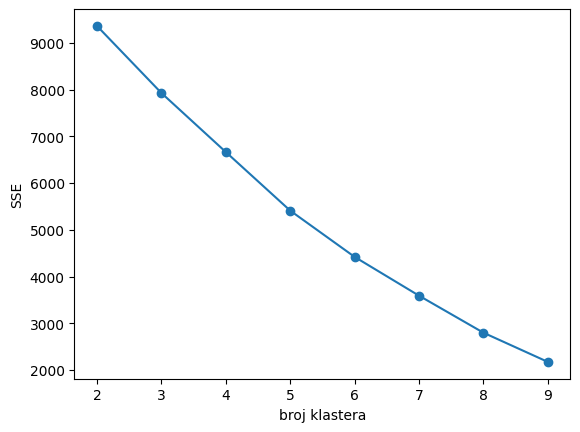

In [77]:
plt.plot([i for i in range(2,10)], sse,marker='o')
plt.xlabel("broj klastera")
plt.ylabel("SSE")

plt.show()

Ocekivano da SSE opada sa porastom broja klastera

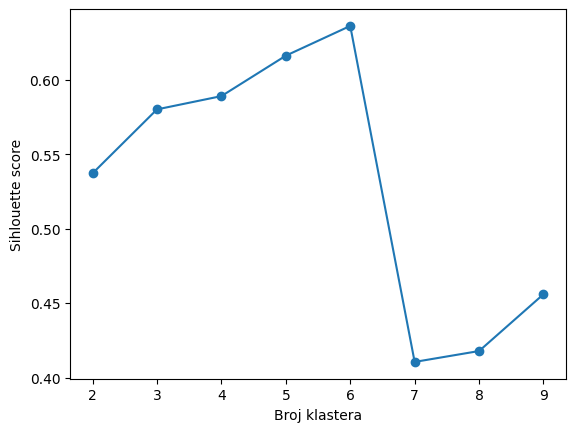

In [78]:
plt.plot([i for i in range(2,10)],scoef,marker='o')
plt.xlabel("Broj klastera")
plt.ylabel("Sihlouette score")
plt.show()

optimalno 6

In [79]:
from sklearn.decomposition import PCA
#X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)
pca = PCA(2)
X = pca.fit_transform(X)

In [80]:
pca.explained_variance_ratio_[0:2].sum()

0.3682070432173382

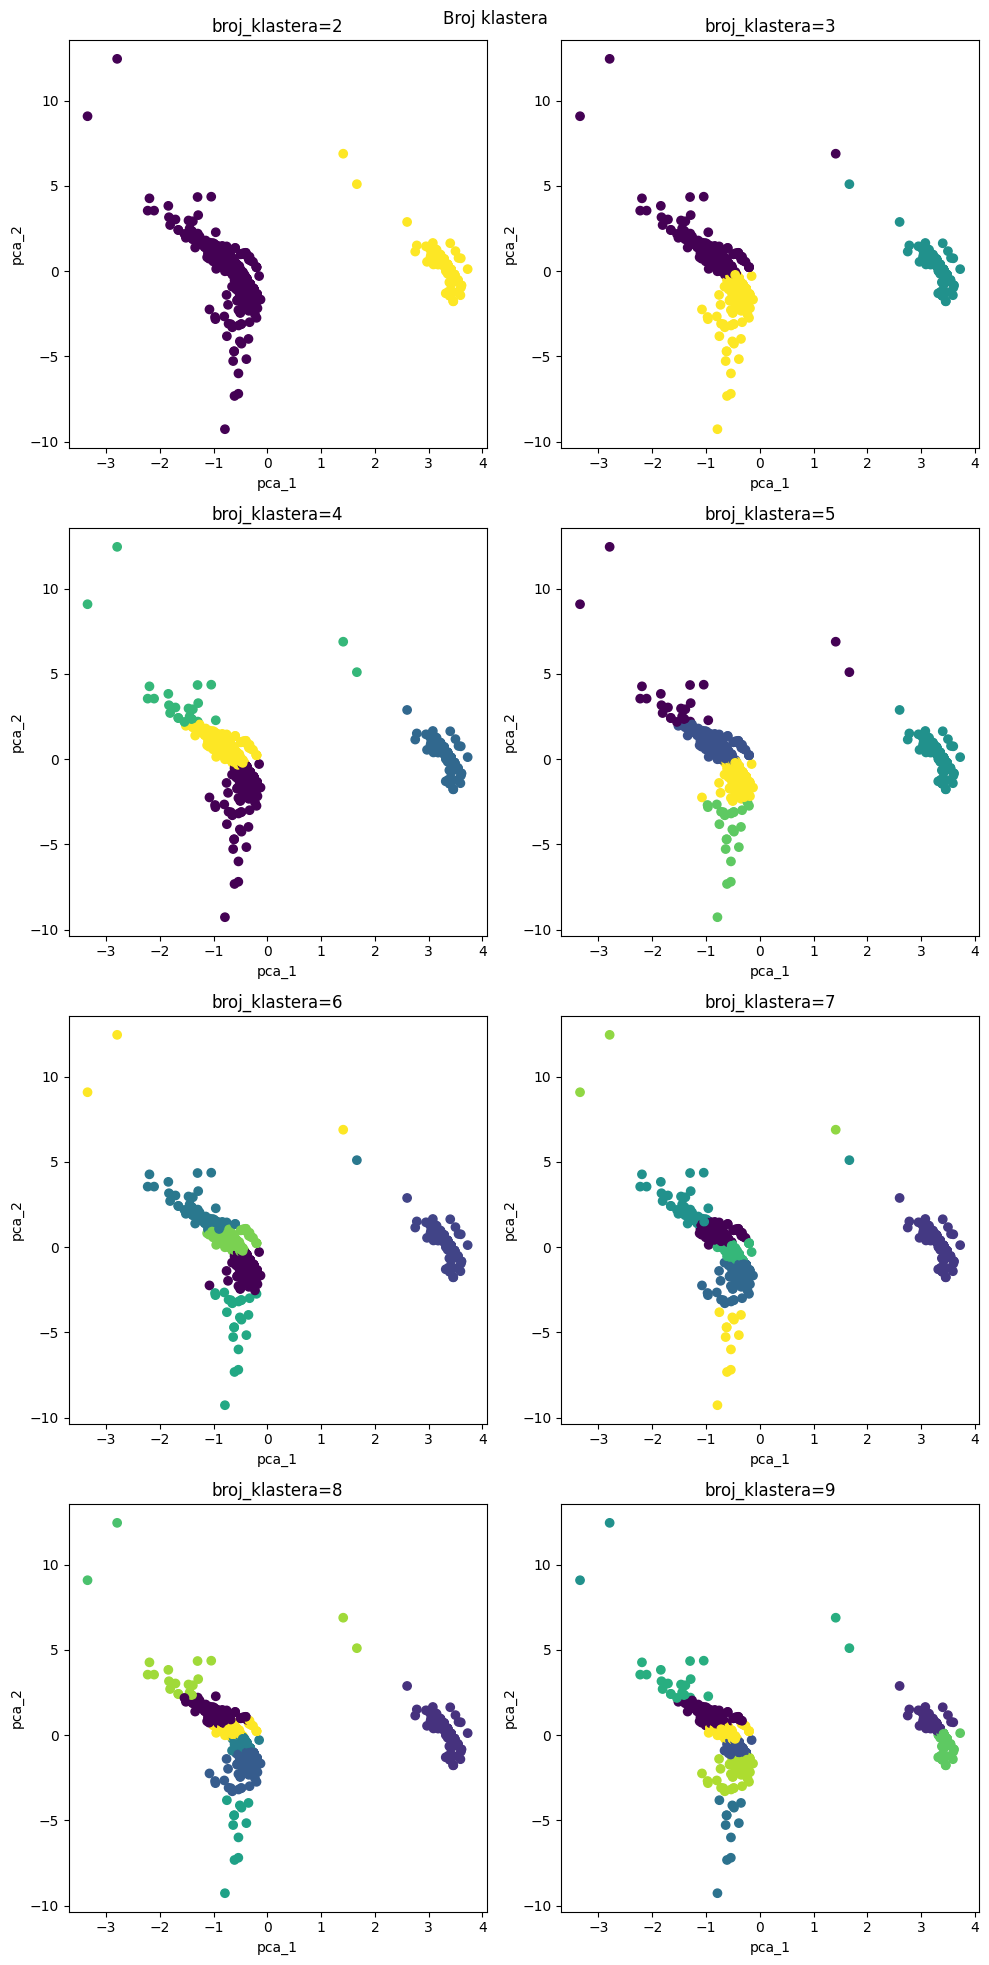

In [81]:
#Vizuelizujmo 
ks = [i for i in range(2, 10)]
sse = []
silh = []
fig, axs = plt.subplots(4, 2, figsize=(10, 20))
fig.suptitle("Broj klastera")

for k, ax in zip(ks, axs.flatten()):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)

    ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
    ax.set_title(f"broj_klastera={k}")
    ax.set_xlabel("pca_1")
    ax.set_ylabel("pca_2")

    sse.append(kmeans.inertia_)
    silh.append(silhouette_score(X, kmeans.labels_))

plt.tight_layout()
plt.show()

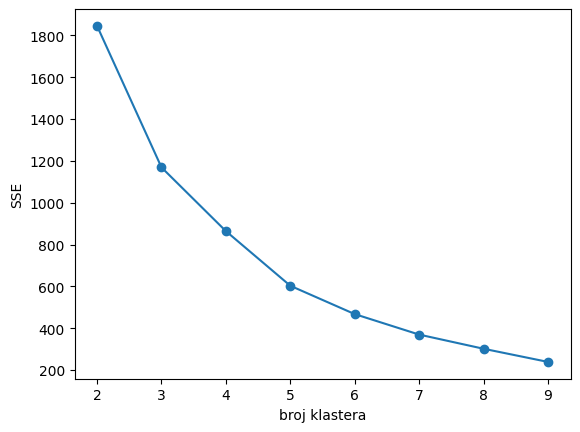

In [82]:
plt.plot([i for i in range(2,10)], sse,marker='o')
plt.xlabel("broj klastera")
plt.ylabel("SSE")

plt.show()

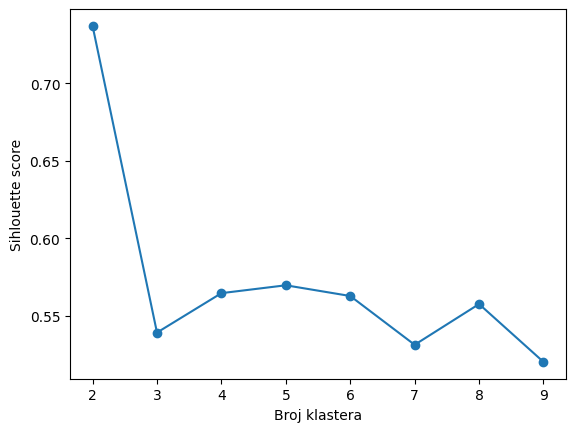

In [83]:
plt.plot([i for i in range(2,10)],silh,marker='o')
plt.xlabel("Broj klastera")
plt.ylabel("Sihlouette score")
plt.show()

In [85]:
#Zelim da probam sa vecim brojem atributa, ali kako su kategoricki ne znam kolko ce dobro proci jer cu morati da smanjim dimenzionalnost sa PCA

In [86]:
X1=data
X1.head()

,Species,Country.of.Origin,Harvest.Year,Variety,Processing.Method,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_mean_meters,Total.Cup.Points
0,0,8,5,5,4,0,0.0,2,0,2075.0,9.0
1,0,8,5,15,4,0,0.0,2,1,2075.0,9.0
2,0,9,3,2,4,0,0.0,2,0,1700.0,9.0
3,0,8,5,5,0,0,0.0,2,2,2000.0,9.0
4,0,8,5,15,4,0,0.0,2,2,2075.0,9.0


In [87]:
X1=data.drop(labels=["Total.Cup.Points"],axis=1)
feature_names=X1.columns

In [88]:
#One hot encoding
hotencoder=OneHotEncoder(feature_name_combiner="concat")
encoder_df=pd.DataFrame(hotencoder.fit_transform(X1[["Country.of.Origin","Variety","Processing.Method","Color"]]).toarray(),columns=hotencoder.get_feature_names_out())


In [89]:
hotencoder.get_feature_names_out()

array(['Country.of.Origin_0', 'Country.of.Origin_1',
       'Country.of.Origin_2', 'Country.of.Origin_3',
       'Country.of.Origin_4', 'Country.of.Origin_5',
       'Country.of.Origin_6', 'Country.of.Origin_7',
       'Country.of.Origin_8', 'Country.of.Origin_9',
       'Country.of.Origin_10', 'Country.of.Origin_11',
       'Country.of.Origin_12', 'Country.of.Origin_13',
       'Country.of.Origin_14', 'Country.of.Origin_15',
       'Country.of.Origin_16', 'Country.of.Origin_17',
       'Country.of.Origin_18', 'Country.of.Origin_19',
       'Country.of.Origin_20', 'Country.of.Origin_21',
       'Country.of.Origin_22', 'Country.of.Origin_23',
       'Country.of.Origin_24', 'Country.of.Origin_25',
       'Country.of.Origin_26', 'Country.of.Origin_27',
       'Country.of.Origin_28', 'Country.of.Origin_29',
       'Country.of.Origin_30', 'Country.of.Origin_31',
       'Country.of.Origin_32', 'Country.of.Origin_33',
       'Country.of.Origin_34', 'Country.of.Origin_35', 'Variety_0',
       

In [90]:
X1=X1.join(encoder_df)

In [91]:
X1.drop(labels=["Country.of.Origin","Variety","Processing.Method","Color"],axis=1,inplace=True)
X1.head()

,Species,Harvest.Year,Category.One.Defects,Quakers,Category.Two.Defects,altitude_mean_meters,Country.of.Origin_0,Country.of.Origin_1,Country.of.Origin_2,Country.of.Origin_3,...,Variety_27,Variety_28,Processing.Method_0,Processing.Method_1,Processing.Method_2,Processing.Method_3,Processing.Method_4,Color_0,Color_1,Color_2
0,0,5,0,0.0,0,2075.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0,5,0,0.0,1,2075.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,3,0,0.0,0,1700.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,5,0,0.0,2,2000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,5,0,0.0,2,2075.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [92]:
#normalizacija
feature_names=X1.columns
X1=pd.DataFrame(scaler.fit_transform(X1),columns=feature_names)

In [93]:
#PCA
X1=pd.DataFrame(pca.fit_transform(X1))

In [94]:
pca.explained_variance_ratio_[0:2].sum()

0.06835231075073411

Objasnili smo jako mali udeo ukupne varijanse, imali smo mnogo binarnih atributa

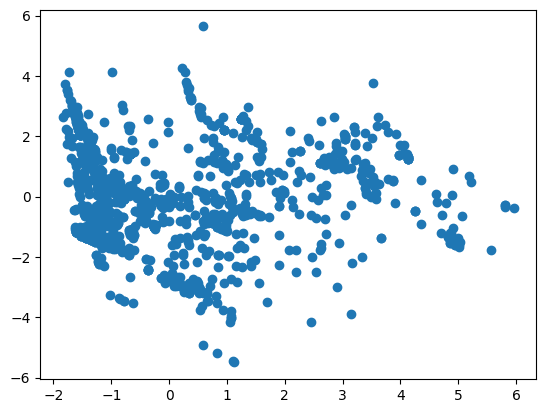

In [95]:
#X1.head()
_=plt.scatter(X1.iloc[:,0],X1.iloc[:,1])

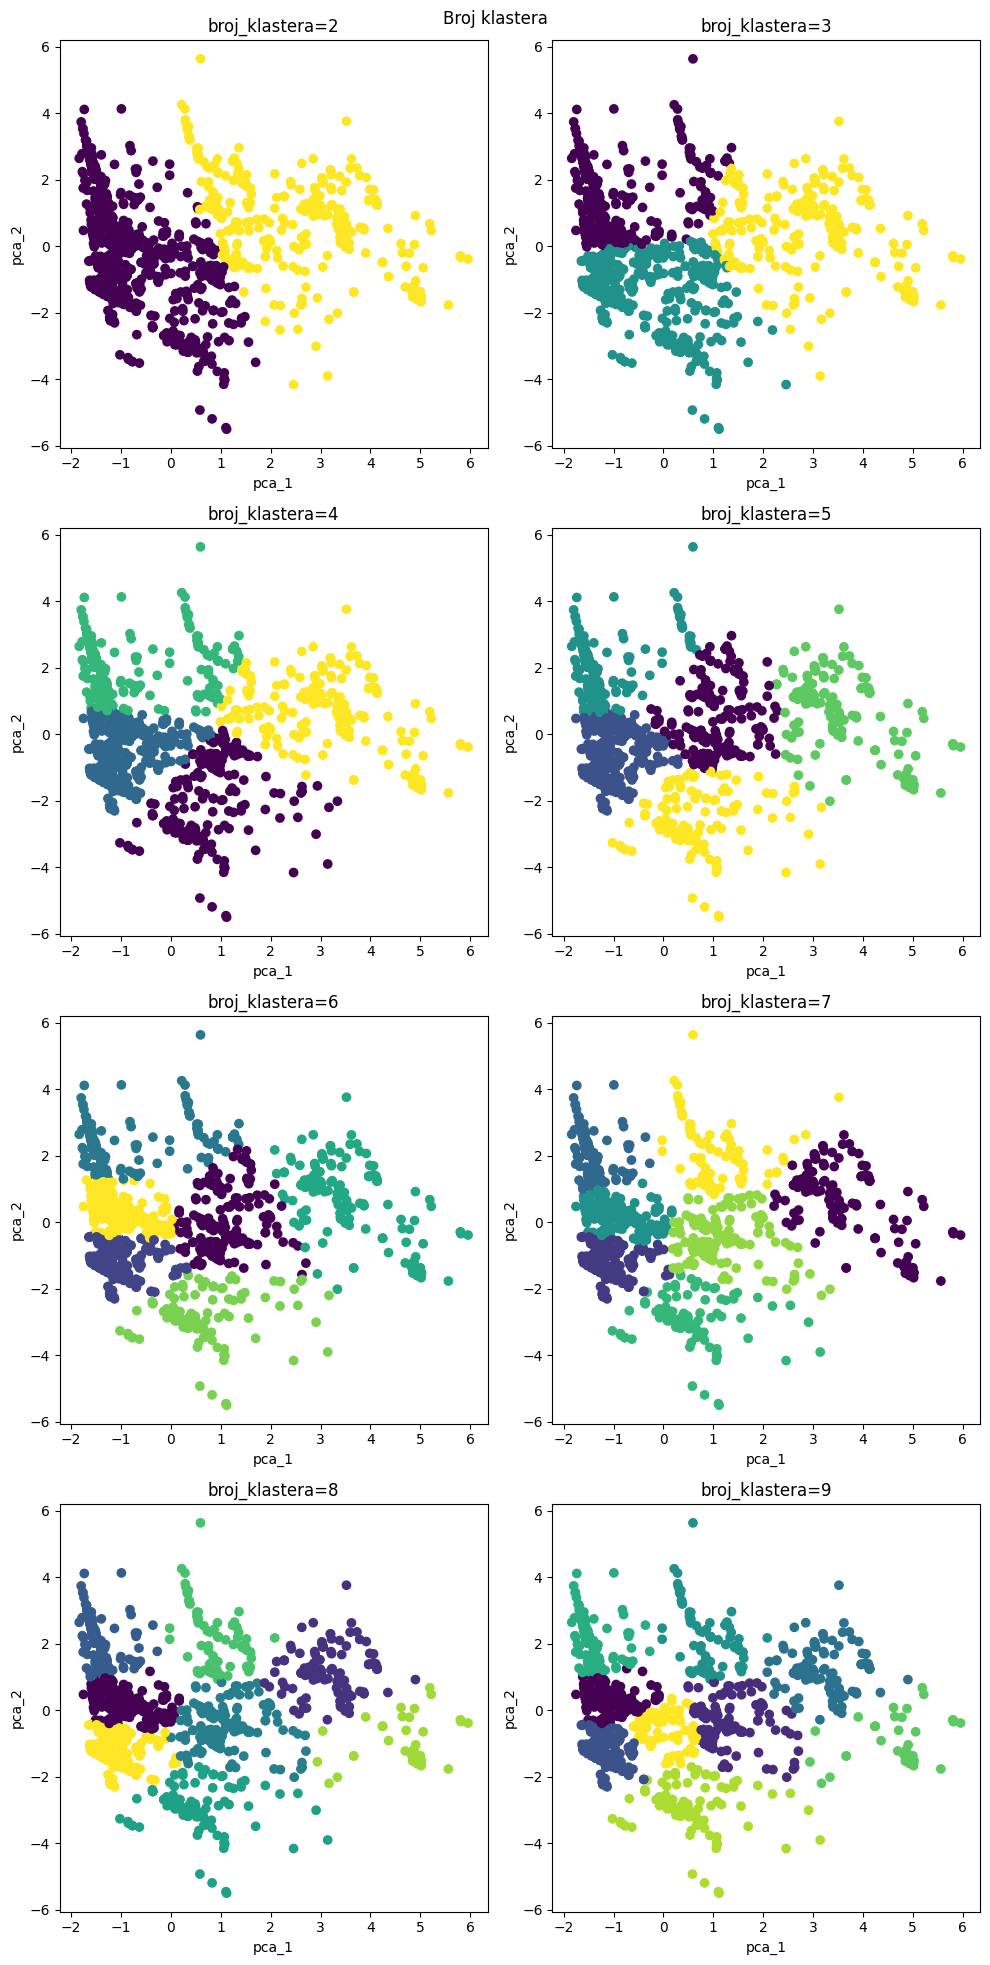

In [96]:
#KMeans
ks = [i for i in range(2, 10)]
sse = []
silh = []
fig, axs = plt.subplots(4, 2, figsize=(10, 20))
fig.suptitle("Broj klastera")

for k, ax in zip(ks, axs.flatten()):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X1)

    ax.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=kmeans.labels_)
    ax.set_title(f"broj_klastera={k}")
    ax.set_xlabel("pca_1")
    ax.set_ylabel("pca_2")

    sse.append(kmeans.inertia_)
    silh.append(silhouette_score(X1, kmeans.labels_))

plt.tight_layout()
plt.show()

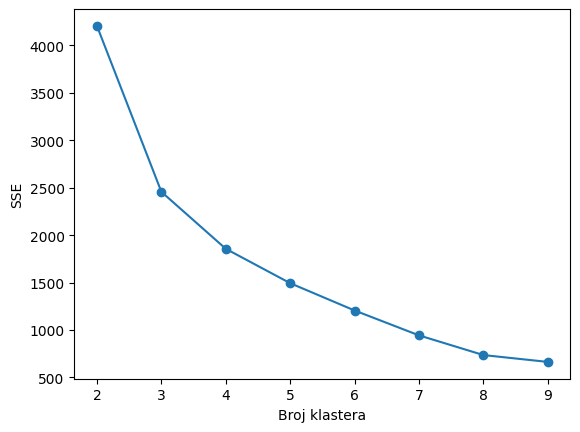

In [108]:
plt.plot([i for i in range(2,10)],sse,marker='o')
plt.xlabel("Broj klastera")
plt.ylabel("SSE")
plt.show()

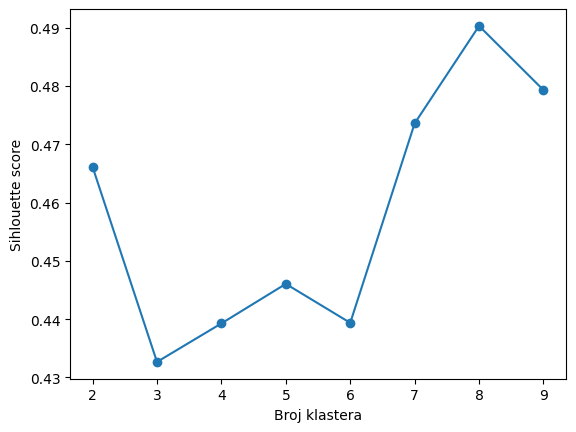

In [98]:
plt.plot([i for i in range(2,10)],silh,marker='o')
plt.xlabel("Broj klastera")
plt.ylabel("Sihlouette score")
plt.show()

In [99]:
#optimalno 3

#### Fuzzy C-Means

In [100]:
from fcmeans import FCM

In [109]:
fcm = FCM(n_clusters=8, m=3)
fcm.fit(X1.to_numpy())

In [110]:
centers=fcm.centers


In [111]:
labels=fcm.predict(X1.to_numpy())

In [112]:
for c in np.unique(labels):
    elems = X1[labels == c]
    print(elems)

             0         1  labels
2    -1.239761  0.463553       2
22   -1.458739  1.051850       2
52   -0.872512  0.281667       2
57   -1.262730  0.614644       2
63    0.849362  1.512501       2
...        ...       ...     ...
1275 -1.318356  0.965727       2
1283 -1.302683  0.865259       2
1284 -1.318356  0.965727       2
1287 -1.152414  0.468892       2
1293 -0.862126  0.714938       2

[258 rows x 3 columns]
             0         1  labels
9     1.176279  0.457804       0
19    1.502636  0.708146       0
25    2.270359  1.502107       0
32    2.270206  1.501997       0
41    1.530010  1.271966       0
...        ...       ...     ...
1253  2.832668  1.063494       0
1269  1.513946  2.148238       0
1271  1.295646  0.731317       0
1291  3.393336  1.121175       0
1325  2.438734  0.653744       0

[137 rows x 3 columns]
             0         1  labels
6     0.077388 -1.942497       1
13   -0.436148 -0.764913       1
16   -0.433960 -0.624210       1
28   -0.699210 -1.116139    

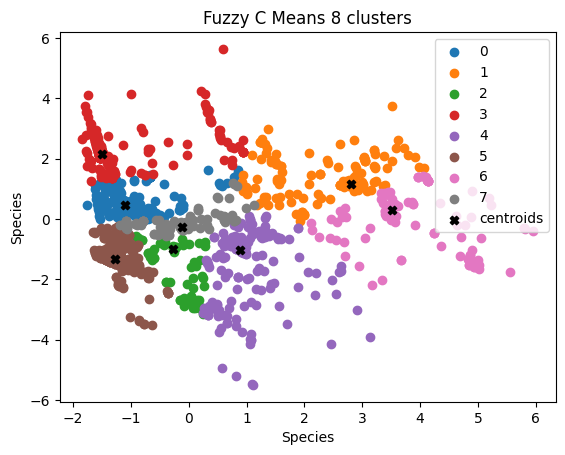

In [113]:
#Vizuelizacija

for c in np.unique(labels):
    elems = X1[labels == c]
    plt.scatter(elems[0], elems[1], label=c)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', label='centroids', color="black")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[0])
plt.title('{} {} clusters'.format("Fuzzy C Means", len(centers)))
plt.legend()
plt.show()

Slican rezultat kao i gore

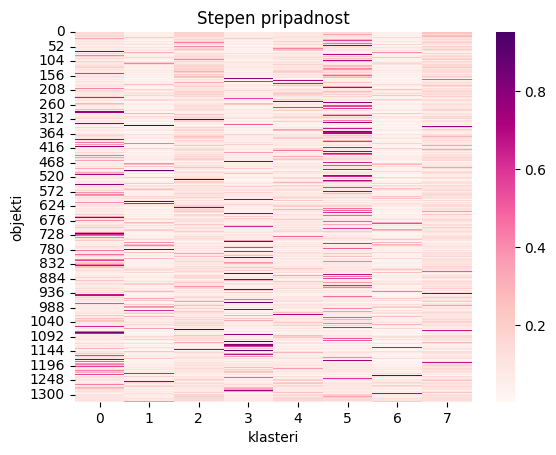

In [114]:
# soft clustering
import seaborn as sns
sns.heatmap(fcm.soft_predict(X1.to_numpy()), cmap='RdPu')
plt.title("Stepen pripadnost")
plt.xlabel('klasteri')
plt.ylabel('objekti')
plt.show()

In [115]:
X1['labels'] = labels
silhouette_score(X1, X1['labels'])

0.6530595851265202